In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Lets download the iris dataset

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Assign the names of columns

In [3]:
headernames = ["sepal-ln",'sepal-width','petal-ln','petal-width','class']

In [4]:
data = pd.read_csv(path,names=headernames)
data.shape

(150, 5)

In [5]:
#Lets obeserve the data
data.head()
data.tail()

,sepal-ln,sepal-width,petal-ln,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#data processing
X = data.iloc[:,:-1].values # read only first columns of data as feature vector
y = data.iloc[:,4].values # last column is predector vector

In [8]:
#Data to be dividing data into training and testing data  70% data as training and 30% as testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [9]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#Naive Bayes implementation
#Training model with help of Gaussian NB class of sklearn

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy of model is : ", accuracy)

Accuracy of model is :  0.9714285714285714


In [12]:
# For NB Classifier accuracy is coming as 94.23 % on training dataset
# Now lets predict using this model
y_pred = classifier.predict(X_test)

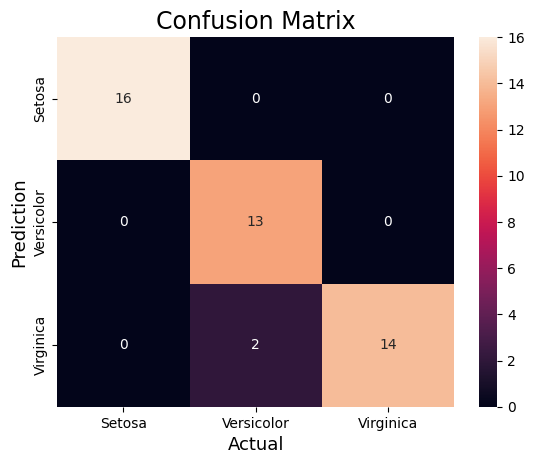

In [13]:
# Now generate the confusion matrix for predicated vs actual results

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test,y_pred)
sns.heatmap(result,
            annot=True,
            fmt= 'g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [14]:
result1 =classification_report(y_test,y_pred)
print("Classification Report: ")
print(result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy :" ,result2)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy : 0.9555555555555556


In [15]:
# Support Vector Machine
#import Support vector classifer
from sklearn.svm import SVC
accuracy_list =[]

for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC(kernel =i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train,y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, "is", float(accuracy))


accuracy of linear is 1.0
accuracy of poly is 0.9333333333333333
accuracy of rbf is 0.9809523809523809
accuracy of sigmoid is 0.9047619047619048


In [16]:
accuracies = {
    'Linear' :accuracy_list[0],
     'Polynomial': accuracy_list[1],
     'RBF': accuracy_list[2],
     'Sigmoid': accuracy_list[3]

}

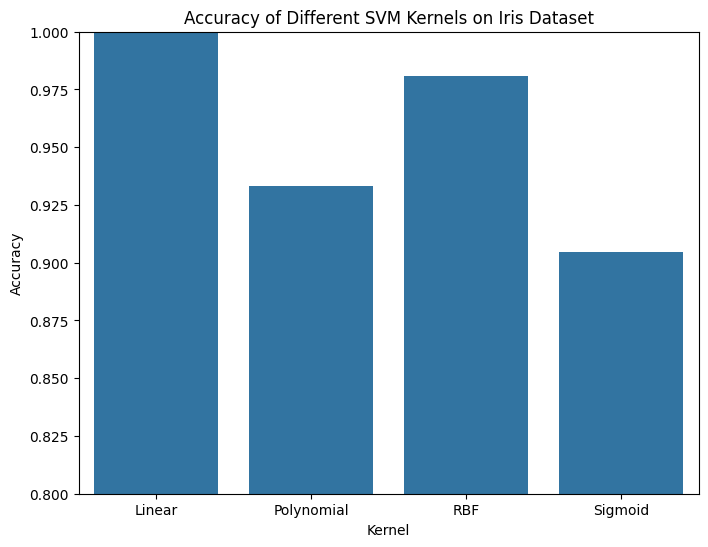

In [17]:
plt.figure(figsize =(8,6))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

In [18]:
# Test on predicated variables
accuracy_list = []
for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC(kernel =i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_list.append(accuracy)
  print("accuracy of "+ i, "is", float(accuracy))

accuracy of linear is 0.9555555555555556
accuracy of poly is 0.9111111111111111
accuracy of rbf is 0.9555555555555556
accuracy of sigmoid is 0.9111111111111111


In [19]:
accuracies = {
    'Linear' :accuracy_list[0],
     'Polynomial': accuracy_list[1],
     'RBF': accuracy_list[2],
     'Sigmoid': accuracy_list[3]

}

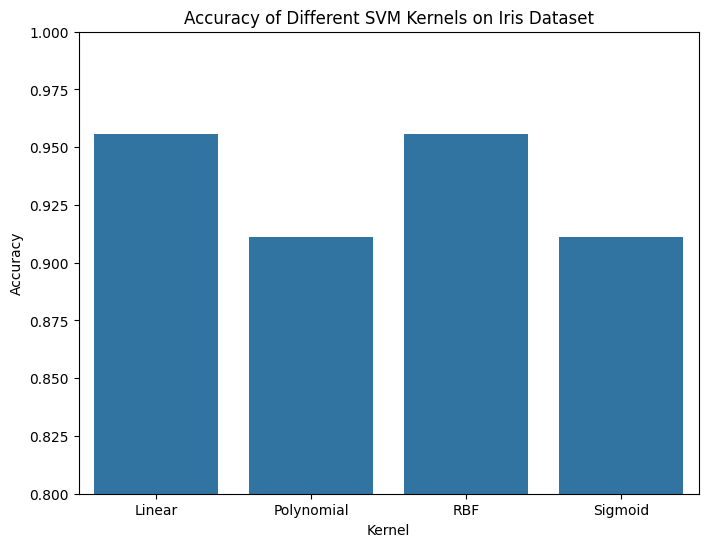

In [20]:
plt.figure(figsize =(8,6))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

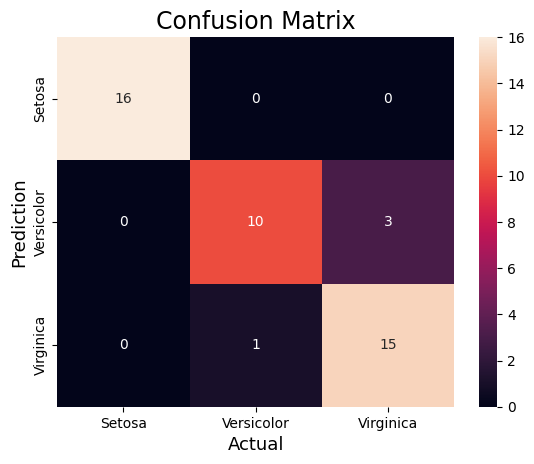

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot= True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [23]:
y_pred = classifier.predict(X_train)
accuracy= accuracy_score(y_train, y_pred)
print("Accuracy is : ",accuracy)

Accuracy is :  0.9714285714285714


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_train)
accuracy= accuracy_score(y_train, y_pred)
print("Accuracy is : ",accuracy)

Accuracy is :  0.9523809523809523


In [24]:
# KNN - Number of neighbors    # 1 is giving best results = 1.0 % accuracy

#predict now
y_pred = classifier.predict(X_test)

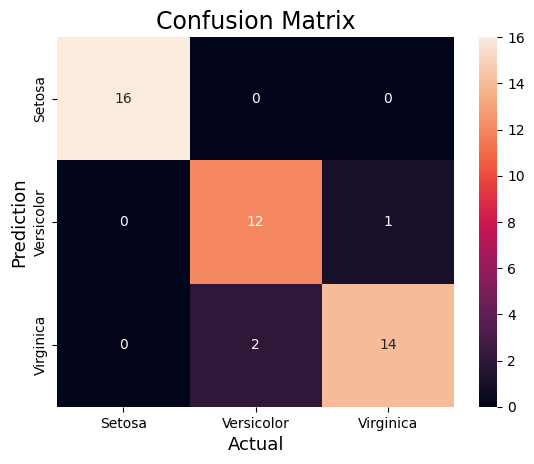

In [25]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot= True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [26]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

Accuracy: 0.9333333333333333
